In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

In [2]:
data_dir = '../ml-1m/'
# data format in rating file: UserID::MovieID::Rating::Timestamp
rating_file = data_dir + 'ratings.dat' 
# data format in user file: UserID::Gender::Age::Occupation::Zip-code
user_file = data_dir + 'users.dat'
# data format in movie file: MovieID::Title::Genres
movie_file = data_dir + 'movies.dat'

In [3]:
df_rating = pd.read_csv(rating_file, sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
df_user = pd.read_csv(user_file, sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])
df_movie = pd.read_csv(movie_file, sep='::', header=None, names=['movie_id', 'title', 'genre'])

<ipython-input-3-b45f810a1726>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_rating = pd.read_csv(rating_file, sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
<ipython-input-3-b45f810a1726>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_user = pd.read_csv(user_file, sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])
<ipython-input-3-b45f810a1726>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you 

In [4]:
age_group_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}
# Occupation dictionary retrieved from dataset description
occupation_dict = {
    0:  "other or not specified",
    1:  "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}


# Exploring Ratings Data

In [29]:
# I decided to remove year 2003 because there is just two months data. 
# I dont know if it would make any difference. We can change that in the future
df_rating = df_rating[df_rating.year != 2003]

In [6]:
df_rating.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [35]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996868 entries, 0 to 996867
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    996868 non-null  int64         
 1   movie_id   996868 non-null  int64         
 2   rating     996868 non-null  int64         
 3   timestamp  996868 non-null  datetime64[ns]
 4   year       996868 non-null  int64         
 5   month      996868 non-null  int64         
 6   date       996868 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 60.8+ MB


In [9]:
df_rating['timestamp'] = df_rating['timestamp'].apply(datetime.fromtimestamp)
df_rating['year'] = df_rating['timestamp'].dt.year
df_rating['month'] = df_rating['timestamp'].dt.month
df_rating['date'] = df_rating['timestamp'].dt.date
df_rating = df_rating.sort_values('timestamp').reset_index(drop=True)

In [30]:
# converted timestamp to UTC. Extracted date and month. Not sure how useful these features will be for content. 
df_rating.head()

,user_id,movie_id,rating,timestamp,year,month,date
0,6040,858,4,2000-04-25 16:05:32,2000,4,2000-04-25
1,6040,2384,4,2000-04-25 16:05:54,2000,4,2000-04-25
2,6040,593,5,2000-04-25 16:05:54,2000,4,2000-04-25
3,6040,1961,4,2000-04-25 16:06:17,2000,4,2000-04-25
4,6040,2019,5,2000-04-25 16:06:17,2000,4,2000-04-25


In [11]:
df_rating.tail()

,user_id,movie_id,rating,timestamp,year,month,date
1000204,4958,2399,1,2003-02-28 09:45:38,2003,2,2003-02-28
1000205,4958,1407,5,2003-02-28 09:47:23,2003,2,2003-02-28
1000206,4958,3264,4,2003-02-28 09:49:08,2003,2,2003-02-28
1000207,4958,2634,3,2003-02-28 09:49:08,2003,2,2003-02-28
1000208,4958,1924,4,2003-02-28 09:49:50,2003,2,2003-02-28


In [42]:
print('Years:', df_rating.year.unique())
print('#Unique users:', df_rating.user_id.nunique())
print('#Unique movies:', df_rating.movie_id.nunique())
print('Average reviews per user : ', df_rating.shape[0]/df_rating.user_id.nunique())
print('Average rating:', round(df_rating.rating.mean(), 2))
print('Frequency of each rating value:')
print(df_rating['rating'].value_counts())

Years: [2000 2001 2002]
#Unique users: 6040
#Unique movies: 3706
Average reviews per user :  165.04437086092716
Average rating: 3.58
Frequency of each rating value:
4    347786
3    260345
5    225645
2    107168
1     55924
Name: rating, dtype: int64


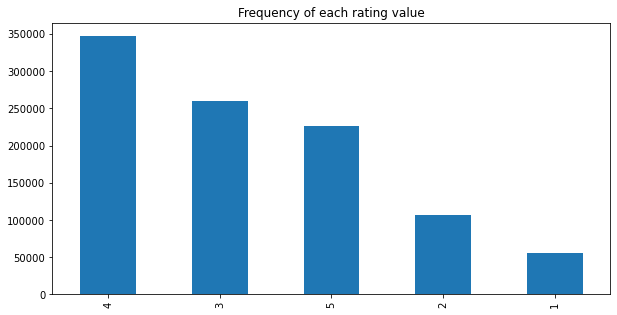

In [32]:
df_rating['rating'].value_counts().plot.bar(title='Frequency of each rating value', figsize=(10, 5));

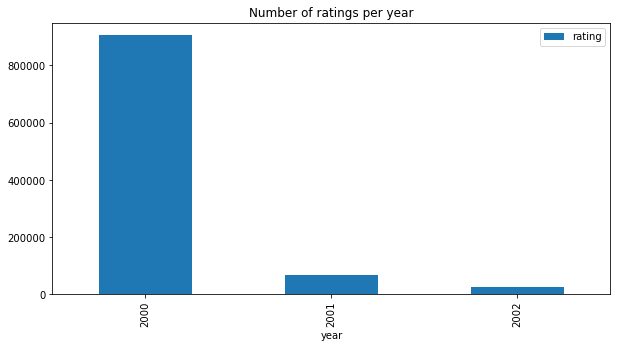

In [33]:
df_rating[['year', 'rating']].groupby(['year']).count().reset_index().plot.bar(x='year', y='rating', title='Number of ratings per year', figsize=(10, 5));

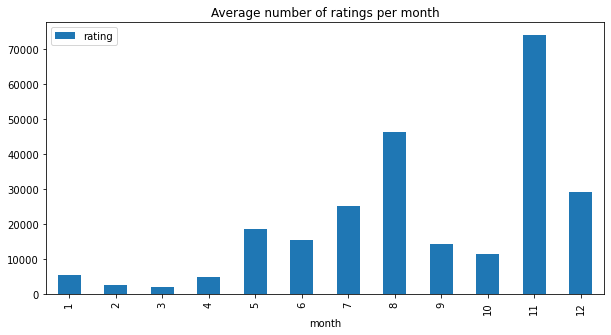

In [34]:
df_temp = df_rating[['month', 'rating']].groupby(['month']).count().reset_index()
df_temp['rating'] = df_temp['rating'] / 4
df_temp.plot.bar(x='month', y='rating', title='Average number of ratings per month', figsize=(10, 5));

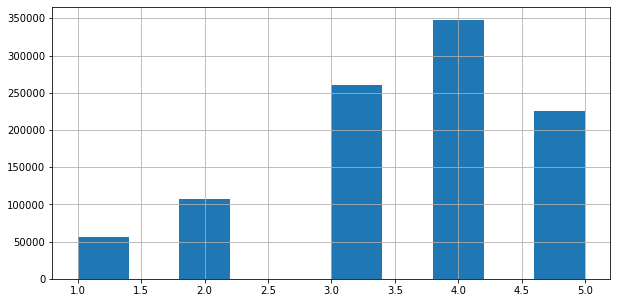

In [36]:
df_rating['rating'].hist(figsize=(10, 5));

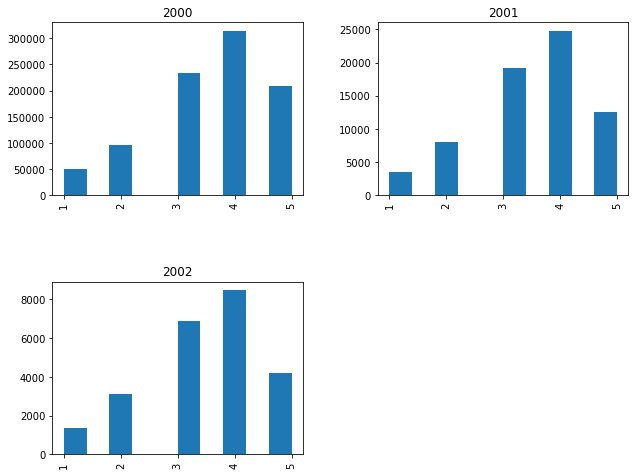

In [40]:
df_rating['rating'].hist(by=df_rating['year'], figsize=(10, 8));

Top 10 users based on ratings

In [44]:
df_rating['user_id'].value_counts().nlargest(n=10)

4169    2314
1680    1850
4277    1728
1941    1595
1181    1521
889     1518
3618    1344
2063    1320
1150    1302
5795    1277
Name: user_id, dtype: int64

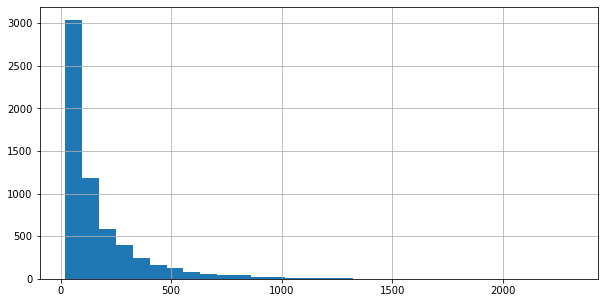

In [6]:
df_rating['user_id'].value_counts().hist(bins=30, figsize=(10, 5));

From the histogram we can observe that most of the people(around 4900) are having number of reviews in the range of 1 to 250. Around 900 people are having 250-500 reviews. 250-300(approximate) people are having more than 500 reviews.

In [46]:
df_rating['movie_id'].value_counts().nlargest(n=10)

2858    3423
260     2986
1196    2981
1210    2878
480     2670
589     2646
2028    2643
2571    2587
1270    2575
593     2574
Name: movie_id, dtype: int64

In [51]:
movie_rating_join_df = pd.merge(df_rating, df_movie, on=["movie_id"])

In [70]:
maxDD = movie_rating_join_df['movie_id'].value_counts().nlargest(10)

In [71]:
maxDD

2858    3423
260     2986
1196    2981
1210    2878
480     2670
589     2646
2028    2643
2571    2587
1270    2575
593     2574
Name: movie_id, dtype: int64

In [65]:
maxDD = list(maxDD.index)

Most reviewed movies

In [68]:
df_movie[df_movie['movie_id'].isin(maxDD)]

,movie_id,title,genre
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
476,480,Jurassic Park (1993),Action|Adventure|Sci-Fi
585,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
589,593,"Silence of the Lambs, The (1991)",Drama|Thriller
1178,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War
1192,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
1250,1270,Back to the Future (1985),Comedy|Sci-Fi
1959,2028,Saving Private Ryan (1998),Action|Drama|War
2502,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
2789,2858,American Beauty (1999),Comedy|Drama


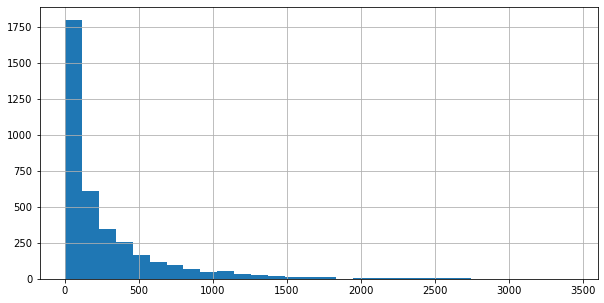

In [7]:
df_rating['movie_id'].value_counts().hist(bins=30, figsize=(10, 5));

We can observe that approximately 3000(90%) of movies having number of reviews in the range of 1-300. Rest of the movies are having more than 500(approximate) reviews.

# Exploring User Data

In [73]:
df_user.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [74]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [75]:
print('Gender distribution:\n', df_user['gender'].value_counts())

Gender distribution:
 M    4331
F    1709
Name: gender, dtype: int64


<AxesSubplot:>

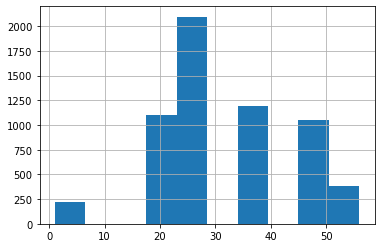

In [77]:
df_user['age'].hist()

We can see that most of the users(approximately 2000) belongs to the age group of 25-34(see the age group dictionary). There are approximately 1000 people belongs to age groups 18-24, 35-44 and 45-49.

# Analyzing Movie Data

In [79]:
df_movie.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [80]:
df_movie['release_year'] = df_movie.title.str.extract("\((\d{4})\)", expand=True).astype(str)

In [81]:
df_movie['release_year'] = pd.to_datetime(df_movie.release_year, format='%Y')
df_movie['release_year'] = df_movie.release_year.dt.year
df_movie['title'] = df_movie.title.str[:-7]

In [82]:
df_movie.head()

,movie_id,title,genre,release_year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [83]:
genres_unique = pd.DataFrame(df_movie.genre.str.split('|').tolist()).stack().unique()
print('Unique genres', genres_unique)
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])

Unique genres ['Animation' "Children's" 'Comedy' 'Adventure' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Sci-Fi' 'Documentary' 'War'
 'Musical' 'Mystery' 'Film-Noir' 'Western']


In [85]:
df_movie = df_movie.join(df_movie.genre.str.get_dummies().astype(bool))
df_movie.drop('genre', inplace=True, axis=1)

In [86]:
df_movie.head()

,movie_id,title,release_year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Father of the Bride Part II,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
print('#Unique movie release years:', df_movie.release_year.nunique())

#Unique movie release years: 81


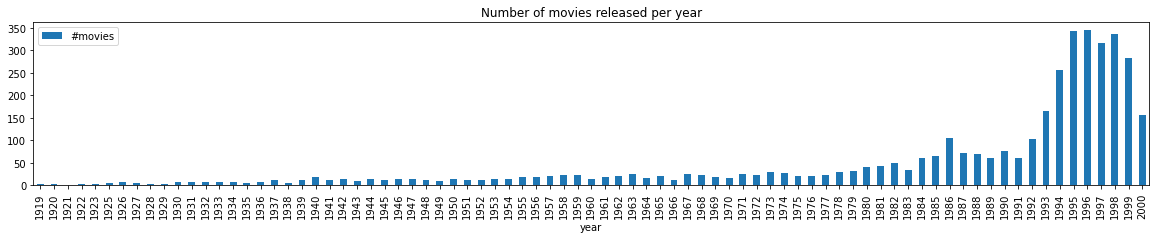

In [88]:
df_temp = df_movie[['release_year', 'movie_id']].groupby(['release_year']).count().reset_index().rename(columns={'release_year':'year', 'movie_id':'#movies'})
df_temp.plot.bar('year', '#movies', title='Number of movies released per year', figsize=(20, 3));

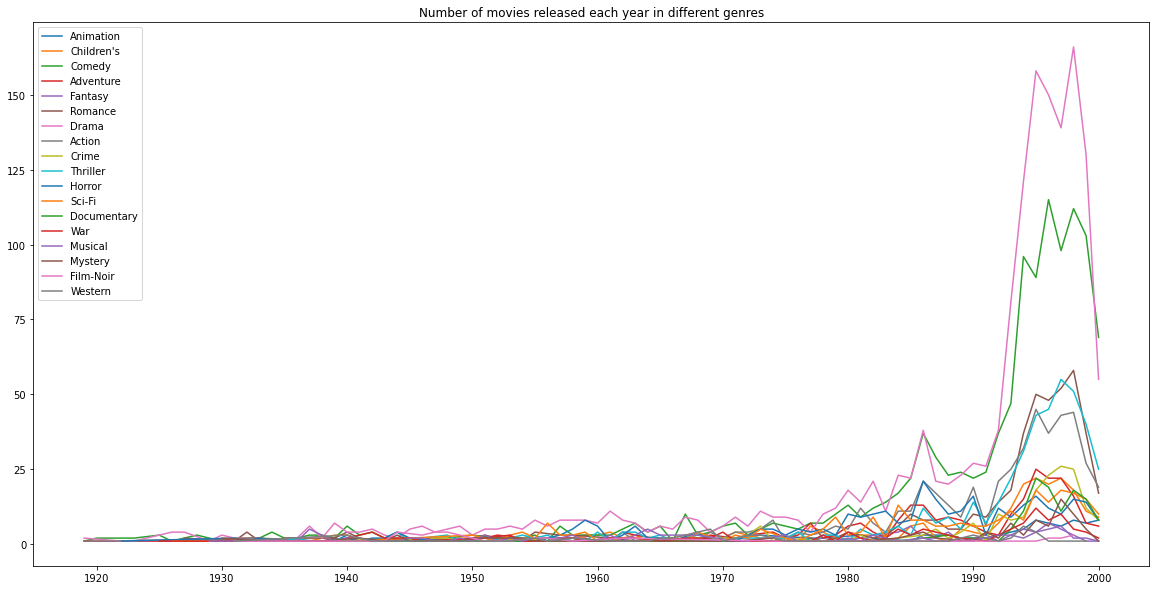

In [89]:


plt.figure(figsize=(20,10)) 
for genre in genres_unique.genre:
    df_temp = df_movie[df_movie[genre]==True][['release_year', 'movie_id']]
    df_temp = df_temp.groupby(['release_year']).count().reset_index().rename(columns={'release_year':'year', 'movie_id':'#movies'})
    plt.plot(df_temp['year'], df_temp['#movies'], label=genre)
plt.title('Number of movies released each year in different genres')
plt.legend()
plt.show()



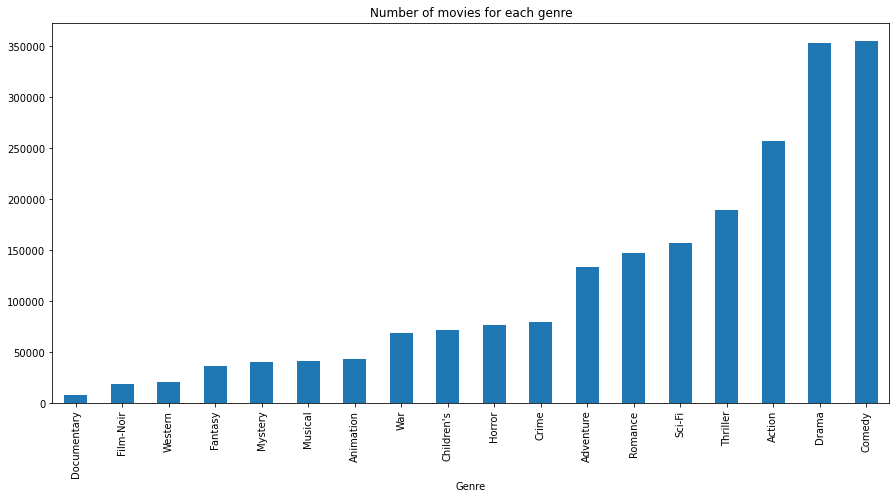

In [92]:
df_temp = pd.DataFrame(columns=['genre', 'num_movies'])
for genre in genres_unique.genre:
    row = [genre, df_final[df_final[genre]==True][['movie_id']].count()]
    df_temp.loc[len(df_temp)] = row
df_temp['num_movies'] = df_temp['num_movies'].astype(np.int32)
df_temp = df_temp.sort_values('num_movies', ascending=True).set_index('genre')
plot_fig = df_temp['num_movies'].plot(kind='bar', figsize=(15,7))
plot_fig.set_title('Number of movies for each genre')
plot_fig.set_xlabel('Genre');

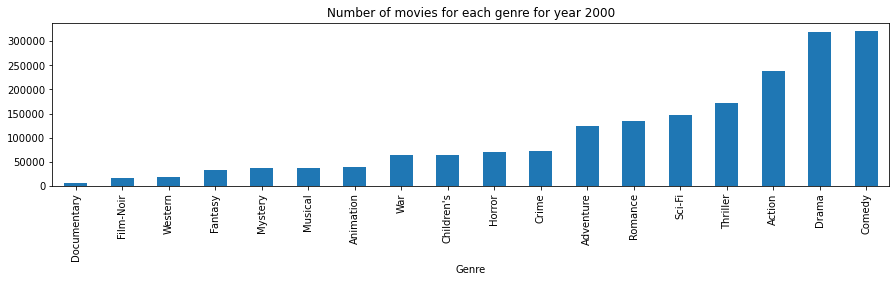

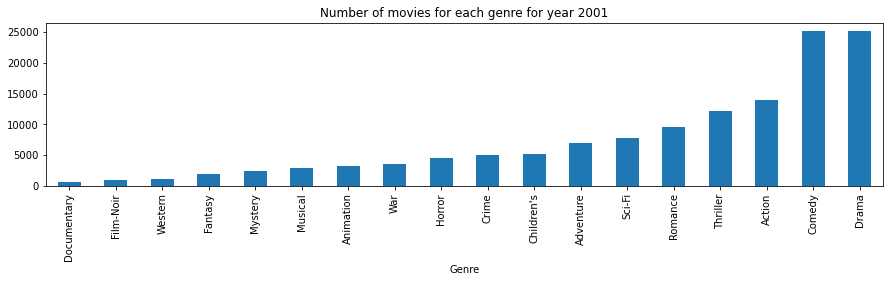

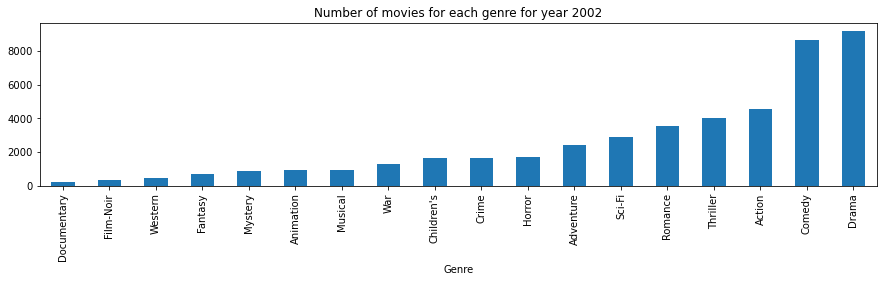

In [93]:
for year in df_final['year'].unique():
    df_year = df_final[df_final['year']==year]
    df_temp = pd.DataFrame(columns=['genre', 'num_movies'])
    for genre in genres_unique.genre:
        row = [genre, df_year[df_year[genre]==True][['movie_id']].count()]
        df_temp.loc[len(df_temp)] = row
    df_temp['num_movies'] = df_temp['num_movies'].astype(np.int32)
    df_temp = df_temp.sort_values('num_movies', ascending=True).set_index('genre')
    plot_fig = df_temp['num_movies'].plot(kind='bar', figsize=(15,3))
    plot_fig.set_title('Number of movies for each genre for year %s'%year)
    plot_fig.set_xlabel('Genre')
    plt.show()


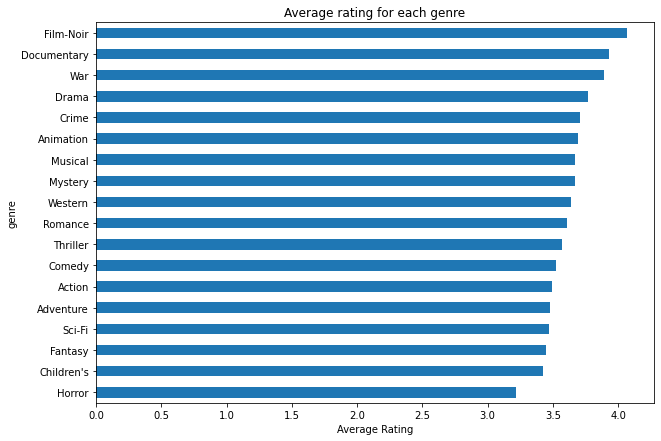

In [94]:
df_temp = pd.DataFrame(columns=['genre', 'avg_rating'])
for genre in genres_unique.genre:
    row = [genre, round(df_final[df_final[genre]==True][['rating']].mean(), 2).to_string()[6:]]
    df_temp.loc[len(df_temp)] = row
df_temp['avg_rating'] = pd.to_numeric(df_temp['avg_rating'])
df_temp = df_temp.sort_values('avg_rating', ascending=True).set_index('genre')
plot_fig = df_temp['avg_rating'].plot(kind='barh', figsize=(10,7))
plot_fig.set_title('Average rating for each genre')
plot_fig.set_xlabel('Average Rating');

# Merging Data

In [90]:
df_temp = df_rating.merge(df_movie, left_on='movie_id', right_on='movie_id', how='left')
df_final = df_temp.merge(df_user, left_on='user_id', right_on='user_id', how='left')
df_final.head()

,user_id,movie_id,rating,timestamp,year,month,date,title,release_year,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,gender,age,occupation,zipcode
0,6040,858,4,2000-04-25 16:05:32,2000,4,2000-04-25,"Godfather, The",1972,True,...,False,False,False,False,False,False,M,25,6,11106
1,6040,2384,4,2000-04-25 16:05:54,2000,4,2000-04-25,Babe: Pig in the City,1998,False,...,False,False,False,False,False,False,M,25,6,11106
2,6040,593,5,2000-04-25 16:05:54,2000,4,2000-04-25,"Silence of the Lambs, The",1991,False,...,False,False,False,True,False,False,M,25,6,11106
3,6040,1961,4,2000-04-25 16:06:17,2000,4,2000-04-25,Rain Man,1988,False,...,False,False,False,False,False,False,M,25,6,11106
4,6040,2019,5,2000-04-25 16:06:17,2000,4,2000-04-25,Seven Samurai (The Magnificent Seven) (Shichin...,1954,True,...,False,False,False,False,False,False,M,25,6,11106


In [91]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996868 entries, 0 to 996867
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       996868 non-null  int64         
 1   movie_id      996868 non-null  int64         
 2   rating        996868 non-null  int64         
 3   timestamp     996868 non-null  datetime64[ns]
 4   year          996868 non-null  int64         
 5   month         996868 non-null  int64         
 6   date          996868 non-null  object        
 7   title         996868 non-null  object        
 8   release_year  996868 non-null  int64         
 9   Action        996868 non-null  bool          
 10  Adventure     996868 non-null  bool          
 11  Animation     996868 non-null  bool          
 12  Children's    996868 non-null  bool          
 13  Comedy        996868 non-null  bool          
 14  Crime         996868 non-null  bool          
 15  Documentary   996

In [96]:
# We can see the average rating by each gender.
print(round(df_final.groupby(['gender'])['rating'].mean(), 2))

gender
F    3.62
M    3.57
Name: rating, dtype: float64


In [97]:
print(round(df_final.groupby(['age'])['rating'].mean(), 2))

age
1     3.55
18    3.51
25    3.55
35    3.62
45    3.64
50    3.71
56    3.77
Name: rating, dtype: float64


We can see a slight positive trend when going from lower to higher age groups. Now let's have a look at the distribution of rating per age group.

In [98]:
df_temp = pd.DataFrame(columns=['occupation', 'avg_rating'])
for occ in occupation_dict.keys():
    row = [occupation_dict[occ], round(df_final[df_final['occupation'] == occ]['rating'].mean(), 2)]
    df_temp.loc[len(df_temp)] = row
df_temp = df_temp.sort_values('avg_rating', ascending=False).reset_index(drop=True)
df_temp


,occupation,avg_rating
0,retired,3.78
1,scientist,3.69
2,clerical/admin,3.66
3,doctor/health care,3.66
4,homemaker,3.66
5,programmer,3.66
6,lawyer,3.62
7,sales/marketing,3.61
8,technician/engineer,3.61
9,self-employed,3.60


Retired persons tend to give slightly higher rating compared to others followed by scientists, clerics, doctors etc. Now let's have a look at the distribution of rating for each occupation type.


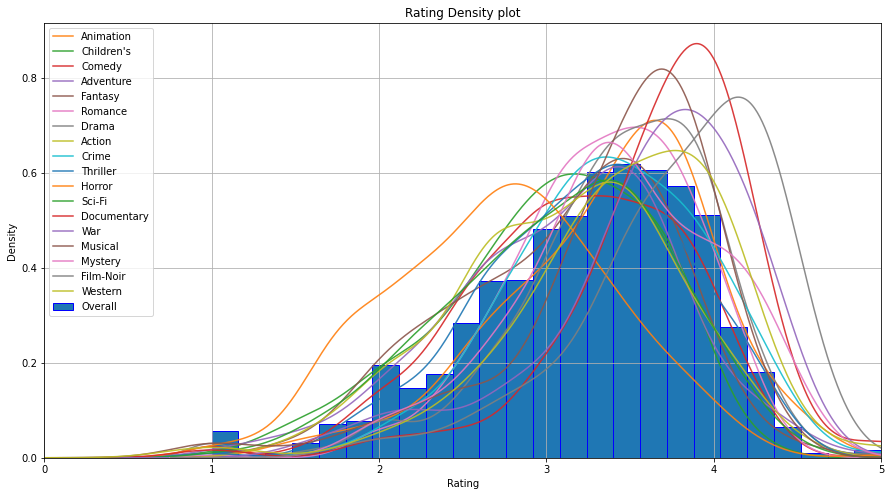

In [100]:
df_temp = df_final[['movie_id','rating']].groupby('movie_id').mean()

# Histogram of all ratings
df_temp.hist(bins=25, grid=False, edgecolor='b', density=True, label ='Overall', figsize=(15,8))

# KDE plot per genre
for genre in genres_unique.genre:
    df_temp = df_final[df_final[genre]==True][['movie_id','rating']].groupby('movie_id').mean()
    df_temp.rating.plot(grid=True, alpha=0.9, kind='kde', label=genre)
plt.legend()
plt.xlim(0,5)
plt.xlabel('Rating')
plt.title('Rating Density plot')
plt.show()



We can see that all genres possess a left-skewed distribution(with a mean around 3.5), except Horror genre because of low rating.
